# Farm Dataset : Exploratory and Predictive Analysis

Overview of the steps I am following in this kernel
1. Problem Statement
2. Assumptions made
3. Understanding the data
5. Exploratory Data Analysis (EDA)
6. Feature Engineering
7. Model Building
8. Conclusion
9. Next Steps

## 1. Problem Statement/Goals

##### Enable the farming company earn more money by using predictive analytics from the data  


## 2. Assumptions Made

1. In Fertilizer_usage, assuming 0 being the lowest and 5 being highest level of fertilizer use.
2. Categories column does not have any specific order

## 3. Understanding the data

### Importing Necessary Libraries and datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from scipy import stats
import matplotlib.style as style
import pylab
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

### Glimpse of the dataset.

In [2]:
# read the data
df_farm = pd.read_csv("C:/Pragya/companies/Alta/assignment/dataset.csv")
df_farm.head()

,id,water,uv,area,fertilizer_usage,yield,pesticides,region,categories
0,169,5.615,65.281,3.230,0,7.977,8.969,0,"b,a,c"
1,476,7.044,73.319,9.081,0,23.009,7.197,0,"c,a,d"
2,152,5.607,60.038,2.864,2,23.019,7.424,0,"d,a"
3,293,9.346,64.719,2.797,2,28.066,1.256,0,d
4,10,7.969,NaN,5.407,1,29.140,0.274,0,"c,d"


### Describing the Dataset

In [3]:
print(f"Dataset has {df_farm.shape[0]} rows and {df_farm.shape[1]} columns")

Dataset has 1000 rows and 9 columns


In [4]:
# check the columns
df_farm.columns

Index(['id', 'water', 'uv', 'area', 'fertilizer_usage', 'yield', 'pesticides',
       'region', 'categories'],
      dtype='object')

The dataset contains information about yield from 1000 farms across a country.

   #### Independent variable:
    - Id : Identifier
    - Water : the average amount of water received by hectare
    - UV : the average amount of light received by hectare
    - Area : the size of the farm in hectares
    - Fertilizer_usage : the level of fertilization
    - Pesticides : the amount of pesticides used per hectare
    - Region : region code
    - Catergories : comma-separated list of pesticides used

   #### Dependent variable/ Target variable:
    - Yield : total crop yield by farm

### Checking for Missing Values

In [5]:
# finding the missing values

def calculate_missing(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing 
    values percentage"""
    total = df.isnull().sum()[df.isnull().sum() != 0]
    percent = round(df.isnull().sum()/len(df)*100,2)[round(df.isnull().sum()/len(df)*100,2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total','Percent (%)'])

calculate_missing(df_farm)

,Total,Percent (%)
water,42,4.2
uv,51,5.1


### Observations from the data exploration

- There are multiple types of features.
- Most of the features are numerical.
- Only two features have missing values.
- *Categories* is a comma-separated list to analyze for which feature extraction is needed.

## 3. Exploratory Data Analysis 

To perform a comprehensive analysis on the data in order to understand the nature of variables and relation with each other I'll perform the folowing analysis:
- Finding data Summary
- Univariate analysis
- Bivariate analysis and Hypothesis testing (Using Bivariate)

In [6]:
# Writing few functions to plot various graphs so that I dont need to re-write the code later.

def plot_charts_3(df, feature):
    
    style.use('seaborn-deep')
    fig = plt.figure(constrained_layout=True, figsize=(15,10))
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    
    data=df.loc[:,feature]
    new_data=data[~np.isnan(data)]
    
    # histogram
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    sns.distplot(new_data, norm_hist=True,  rug=True, ax = ax1)

    # QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('QQ_plot')
    stats.probplot(new_data, plot = ax2)

    ## Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ax3.set_title('Box Plot')
    sns.boxplot(new_data, orient='v', ax = ax3 );

In [7]:
# Scatter plot
def customized_scatterplot(y, x):
    style.use('seaborn-deep')
    plt.subplots(figsize = (10,7))
    sns.scatterplot(y = y, x = x);

In [8]:
def customized_countplot(data, x):
    style.use('seaborn-deep')
    sns.catplot(x=x, kind="count", palette="ch:.25", height=5, data=data);

In [9]:
def custom_boxplot(x, y):
    style.use('seaborn-deep')
    data = pd.concat([y, x], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=x, y=y, data=data)

### Analysing the target variable

'yield' is the reason of our quest. Performing a descriptive analysis on this field first

In [10]:
# finding summaries

df_farm['yield'].describe()

count    1000.000000
mean       58.758571
std        24.563683
min         2.843000
25%        40.698000
50%        55.602500
75%        73.645500
max       148.845000
Name: yield, dtype: float64

Since the mean and median are very close to each other, I am expecting the data to be normally distributed. 

#### Now, Let's try to figure out the the distribution of yield in the data.

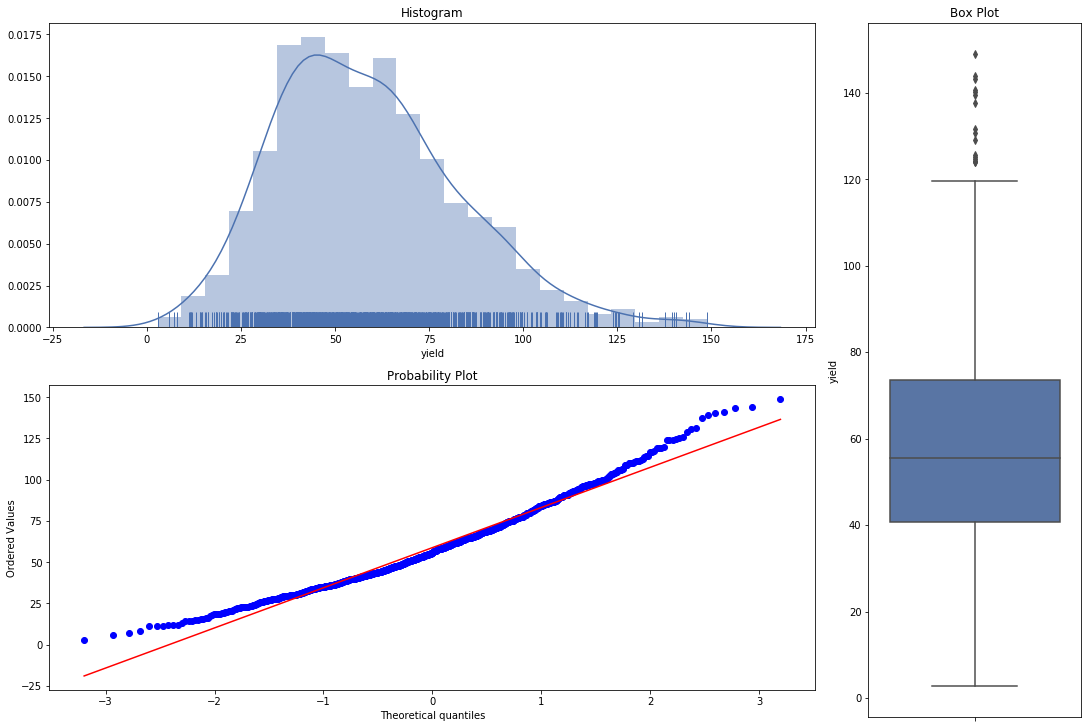

In [11]:
plot_charts_3(df_farm, 'yield')

In [12]:
#skewness

print("Skewness: %f" % df_farm['yield'].skew())

Skewness: 0.633015


### Observations

- Our target variable, *yield* is nearly normally distributed with a slight positive skewness of 0.63 which is **negligible** and can be ignored
- There are probable outliers in the variable, will treat them later since this is a target variable

### Analysing the predictors

As much it is important to understand the nature of our target variable, it is also important to understand the distribution of our predictor variables. Summaries and univariate graphs will give us a better understanding about the rest of the data while bivariate analysis will help in understanding the relationship between the predictors and target variable.

Our independent variables are further divided into 2 categories:

#### Numerical Variables:
    - Water
    - UV
    - Area
    - Pesticides
    
#### Categorical Variables:
    - Fertilizer_usage
    - Region
    - Categories

#### Let's start by analysing the numerical variables.

### # *Water*

In [13]:
# describe water

df_farm['water'].describe()

count     958.000000
mean       12.223546
std       172.335566
min         0.072000
25%         4.584750
50%         6.476000
75%         8.758750
max      5340.000000
Name: water, dtype: float64

Clearly, there are some outliers in this variable. Let's perform univariate analysis and understand more about it.

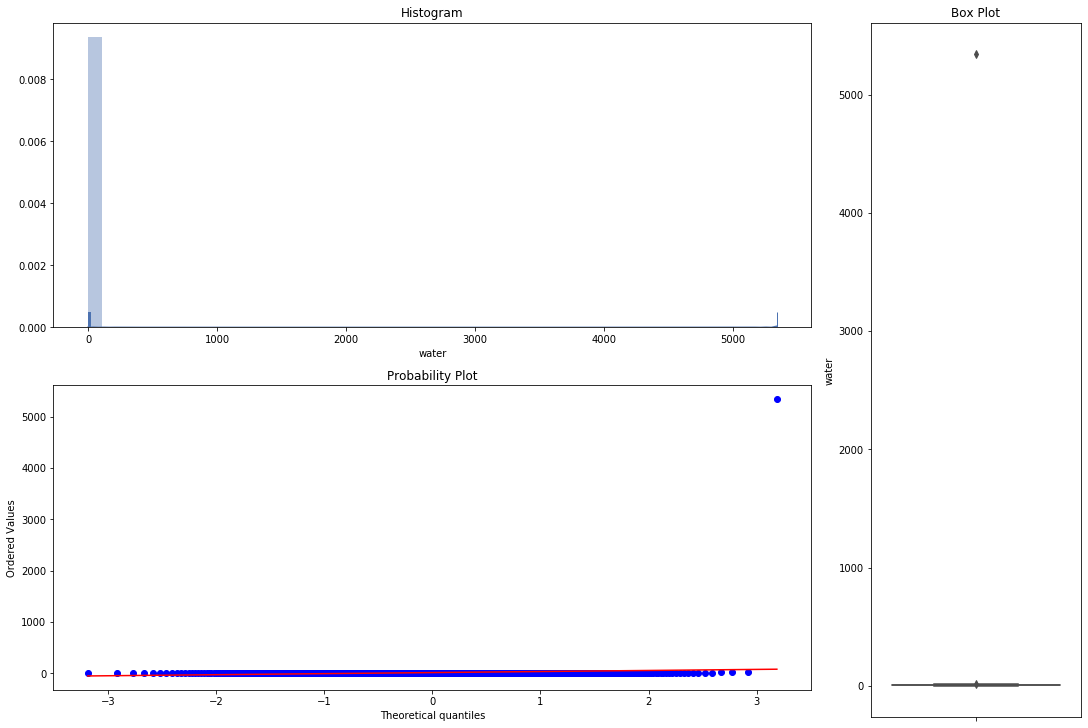

In [14]:
#univariate analysis
plot_charts_3(df_farm, 'water')


There is no clear distribution of this variable since there is an outlier. Will describe it in detail later 

Bivariate analysis to check the relationship between 'water' and 'yield'.

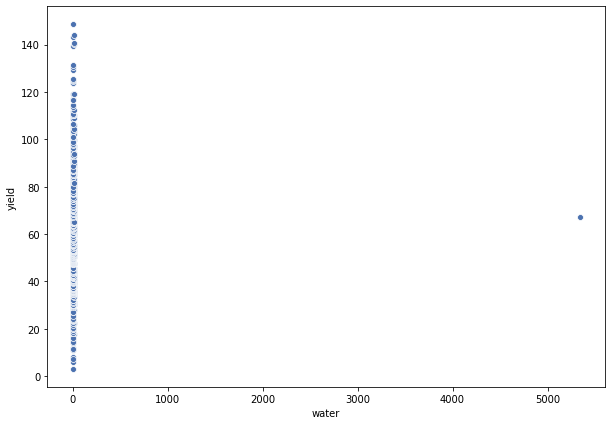

In [15]:
#scatter plot water/yield    
customized_scatterplot(df_farm['yield'], df_farm['water'])

### Observation

- Distribution of the data is not clear as the data contains outlier.

Will analyse the data once again after treating the outlier.

### # *UV*

In [16]:
# describe UV

df_farm['uv'].describe()

count    949.000000
mean      73.957488
std        9.904063
min       45.264000
25%       66.502000
50%       73.689000
75%       80.554000
max      106.310000
Name: uv, dtype: float64

Let's perform univariate and bivariate analysis to understand more about it.

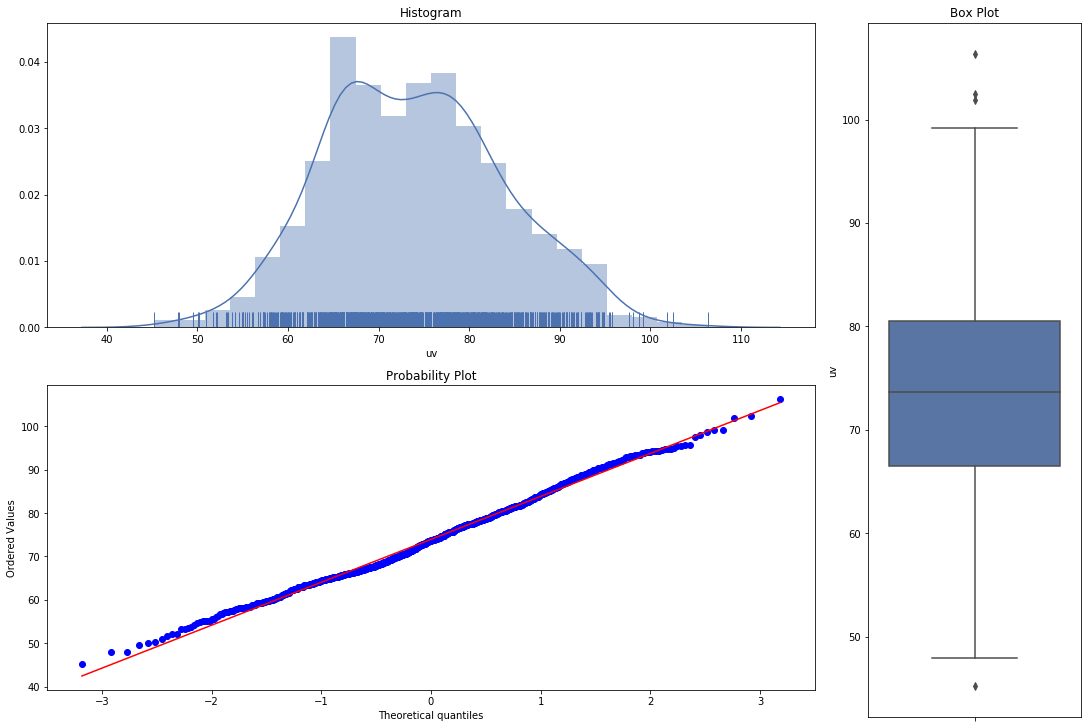

In [17]:
#univariate analysis
plot_charts_3(df_farm, 'uv')


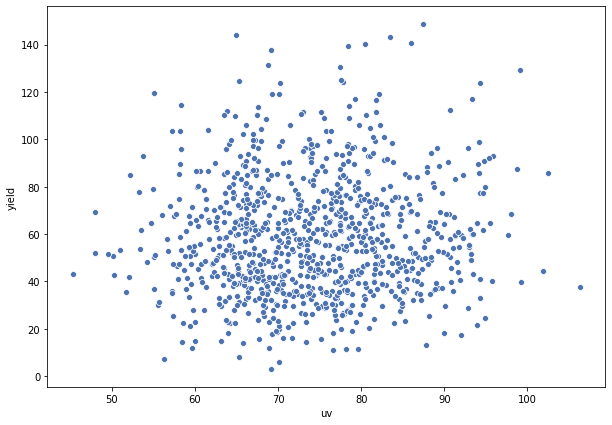

In [18]:
#scatter plot uv/yield
    
customized_scatterplot(df_farm['yield'], df_farm['uv'])

### Observation

- The data is bimodal normally distributed.
- The data contains some probable outlier, but they few and very close to the range that it can be **ignored**.
- It doesn't seem like UV has any strong relation with yeild.




### # *area*

In [19]:
# describe area

df_farm['area'].describe()

count    1000.000000
mean        8.098848
std         2.692632
min         0.263000
25%         6.297000
50%         7.987500
75%         9.900250
max        18.311000
Name: area, dtype: float64

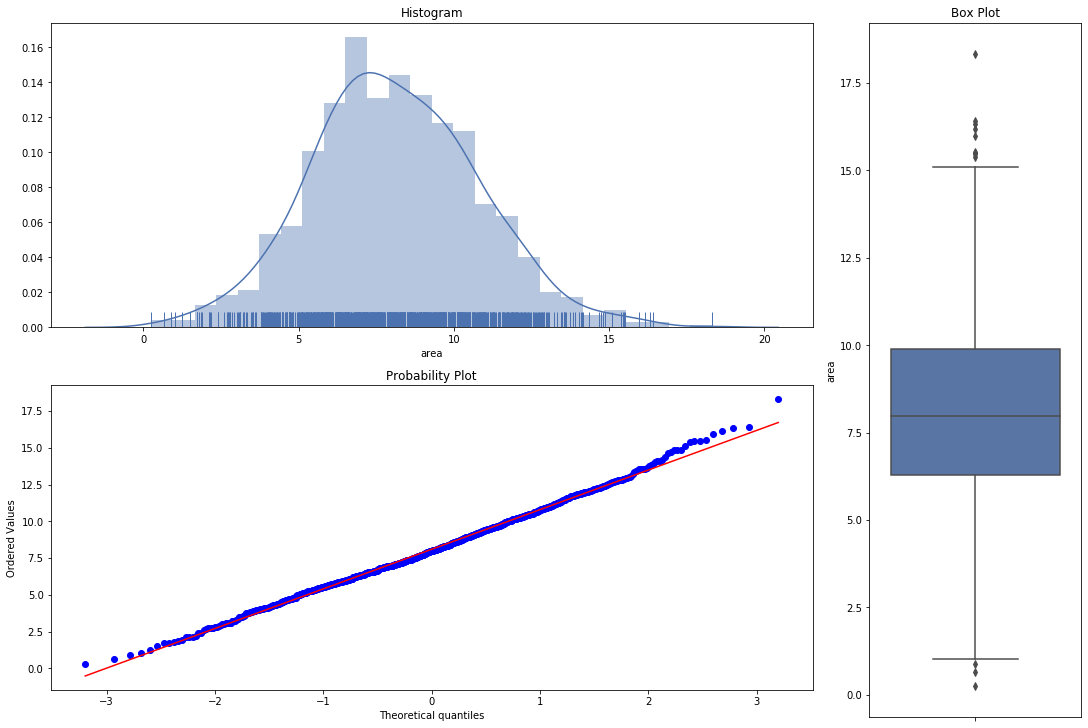

In [20]:
#univariate analysis

plot_charts_3(df_farm, 'area')

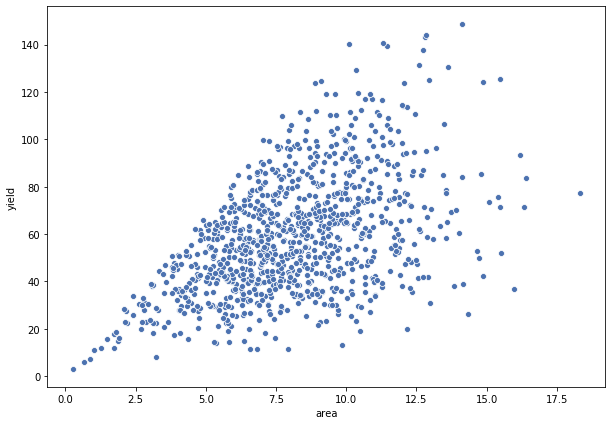

In [21]:
#scatter plot area/yield
customized_scatterplot(df_farm['yield'], df_farm['area'])

Tried applying log and square root transformation on the neumerical variables, for example *'squareroot(area)/yield'*, but it didn't show any improvement in linearity.

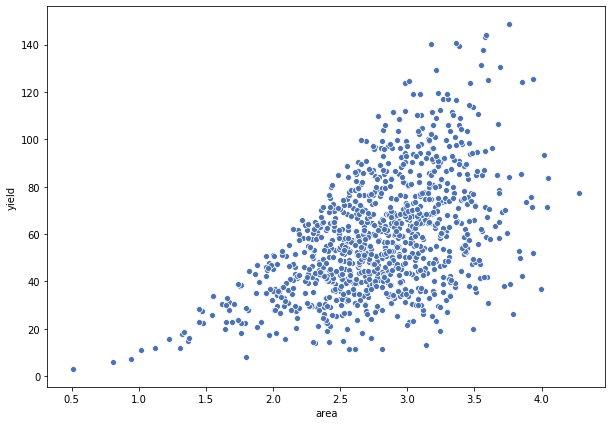

In [22]:
#scatter plot squareroot(area)/yield

customized_scatterplot(df_farm['yield'], np.sqrt(df_farm['area']))

### Observations

- The data is normally distributed. 
- There are a few outliers.
- The relationship between area and yeild seems non-linear. 

### # *pesticides*

In [23]:
# describe pesticides

df_farm['pesticides'].describe()

count    1000.000000
mean        3.452301
std         2.076921
min         0.014000
25%         1.804500
50%         3.275500
75%         4.916000
max         9.532000
Name: pesticides, dtype: float64

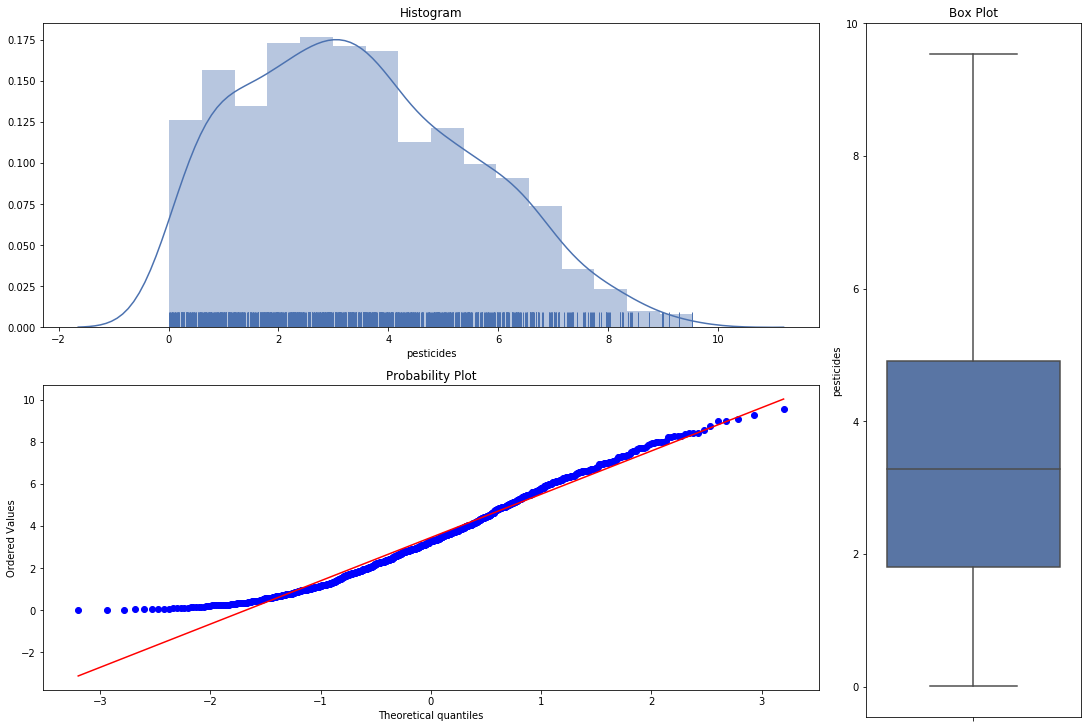

In [24]:
#univariate analysis

plot_charts_3(df_farm, 'pesticides')

In [25]:
#skewness and kurtosis

print("Skewness: %f" % df_farm['pesticides'].skew())
print("kurtosis: %f" % df_farm['pesticides'].kurt())

Skewness: 0.389928
kurtosis: -0.581145


Negative curtosis means that the distribution is flatter than the normal distribution

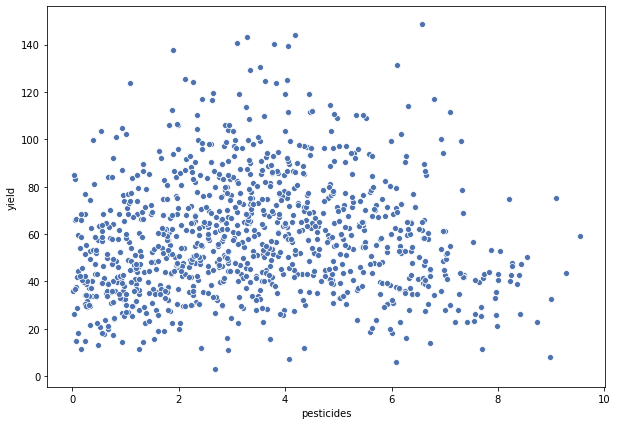

In [26]:
#scatter plot pesticides/yield
customized_scatterplot(df_farm['yield'], df_farm['pesticides'])

### Observations

- The data seems slightly positively skewed with a skewness of 0.38
- There is no outlier in the data.
- The graph shows that there is no significant contribution of pesticides in the amount of crop yield. 

#### Now let's move towards analysing the categorical variables.

### # *fertilizer_usage*

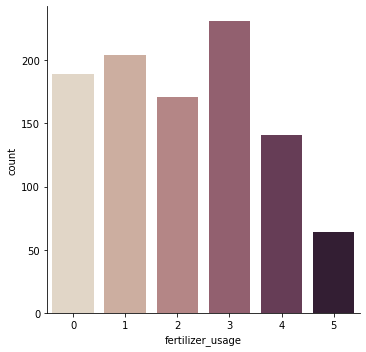

In [27]:
# countplot
    
customized_countplot(df_farm, 'fertilizer_usage')

Its evident that the category '3' in fertilizer usage is the highest and category '5' is the least. Let's plot a graph to show realtionship between yield and fertilizer_usage.

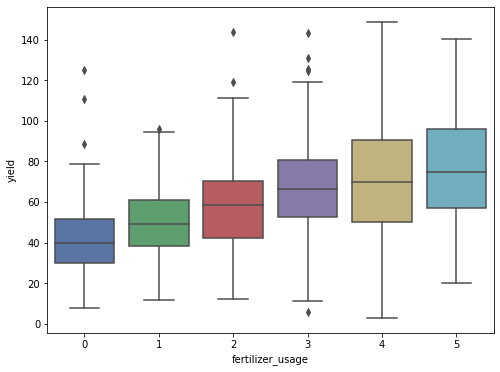

In [28]:
#box plot fertilizer_usage/yield
   
custom_boxplot(df_farm['fertilizer_usage'], df_farm['yield'])

In [29]:
df_farm.groupby(['fertilizer_usage'])['yield'].agg('sum')

fertilizer_usage
0     8010.530
1    10302.420
2     9933.892
3    15473.346
4    10143.121
5     4895.262
Name: yield, dtype: float64

### Observations

- The graph shows fertilizer 3 has highest usage.
- Looking at the boxplots, its evident that with an increase of fertilizer level usage the yeild also increases. 
    -- Category 3 has the maximum yield, ideally it should come as a significant variable in the model

### # *region*

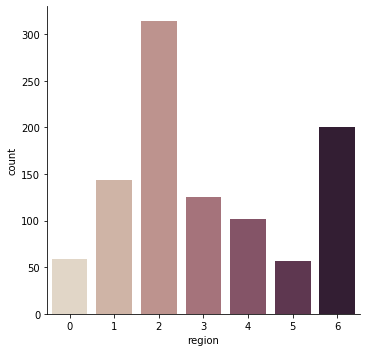

In [30]:
# countplot

customized_countplot(df_farm, 'region')

Now let's look at its relationship with yeild

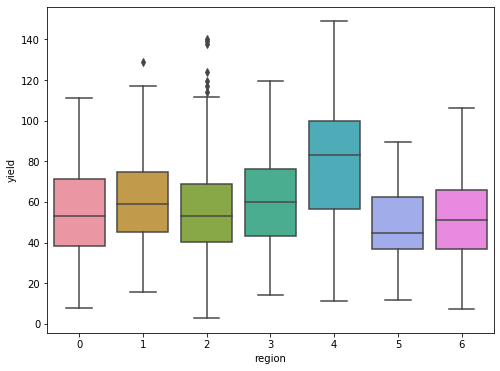

In [31]:
#box plot region/yield
    
custom_boxplot(df_farm['region'], df_farm['yield'])

In [32]:
df_farm.groupby(['region'])['yield'].agg('sum')

region
0     3372.008
1     8799.123
2    17511.503
3     7582.605
4     8139.080
5     2767.133
6    10587.119
Name: yield, dtype: float64

### Observations

- The countplot shows that the data region 2 and 6 are highly populated than the rest of the regions. 
- Region 4 has the maximum individual crop productivity among all the regions.
    -- Region 2 has maximum yield overall

Since the variable 'categories' is a comma separated column, Data transformation is required in order to perform analysis. Will show that in the feature engineering part

# FEATURE ENGINEERING


## 1. Outlier Treatment


All the data points of **'water'** lies within the range of 0 to 20 but there is only one data point of 5340 which is clearly an outlier. SInce there is only one outlier, so for outlier treatment, I'll replace it with its median. And then plot the graphs again to see the data distribution and relation.

In [33]:
# replacing outlier with median value

median = df_farm.loc[df_farm['water']<100, 'water'].median()
df_farm["water"] = np.where(df_farm["water"] >100, median,df_farm['water'])

###  2. Missing Value treatment

Since *water* and *uv* both the columns are normally distributed. I have replaced missing values with mean value of that column.

In [34]:
# replacing na and nan values with the mean

df_farm.fillna(df_farm.mean(), inplace=True)

### 3. Treating *categories*

Since, Categories is a comma-separated list of pesticides used, I have extracted features and created derived **features**.
- First, I have introduced a new column *'pesticide_count'* which contains total number of pesticides used per id. 
- Second I have tranformed the column *'categories'* into 4 new columns named *'pest_a'*, *'pest_b'*, *'pest_c'* and *'pest_d'* and assigned 1 to those pesticides which are used on that farm and assigned 0 otherwise, in other words I have transformed *'categories'* column using one-hot encoding.
- Finally, I have dropped the column 'categories'.

In [35]:
# introduce new column 'pesticide_count'
df_farm['pesticide_count'] = df_farm.categories.str.count(',')+1

# 
df_farm['pest_a'] = 0
df_farm['pest_b'] = 0
df_farm['pest_c'] = 0
df_farm['pest_d'] = 0

for index, row in df_farm.iterrows():
    df_farm.loc[df_farm['categories'].str.contains('a'), 'pest_a'] =1
    df_farm.loc[df_farm['categories'].str.contains('b'), 'pest_b'] =1
    df_farm.loc[df_farm['categories'].str.contains('c'), 'pest_c'] =1
    df_farm.loc[df_farm['categories'].str.contains('d'), 'pest_d'] =1




In [36]:
#drop column categories
df_farm = df_farm.drop(['categories'], axis=1)


In [37]:
df_farm.head()

,id,water,uv,area,fertilizer_usage,yield,pesticides,region,pesticide_count,pest_a,pest_b,pest_c,pest_d
0,169,5.615,65.281000,3.230,0,7.977,8.969,0,3,1,1,1,0
1,476,7.044,73.319000,9.081,0,23.009,7.197,0,3,1,0,1,1
2,152,5.607,60.038000,2.864,2,23.019,7.424,0,2,1,0,0,1
3,293,9.346,64.719000,2.797,2,28.066,1.256,0,1,0,0,0,1
4,10,7.969,73.957488,5.407,1,29.140,0.274,0,2,0,0,1,1


#### Now analysing variables after feature engineering

### #*water*

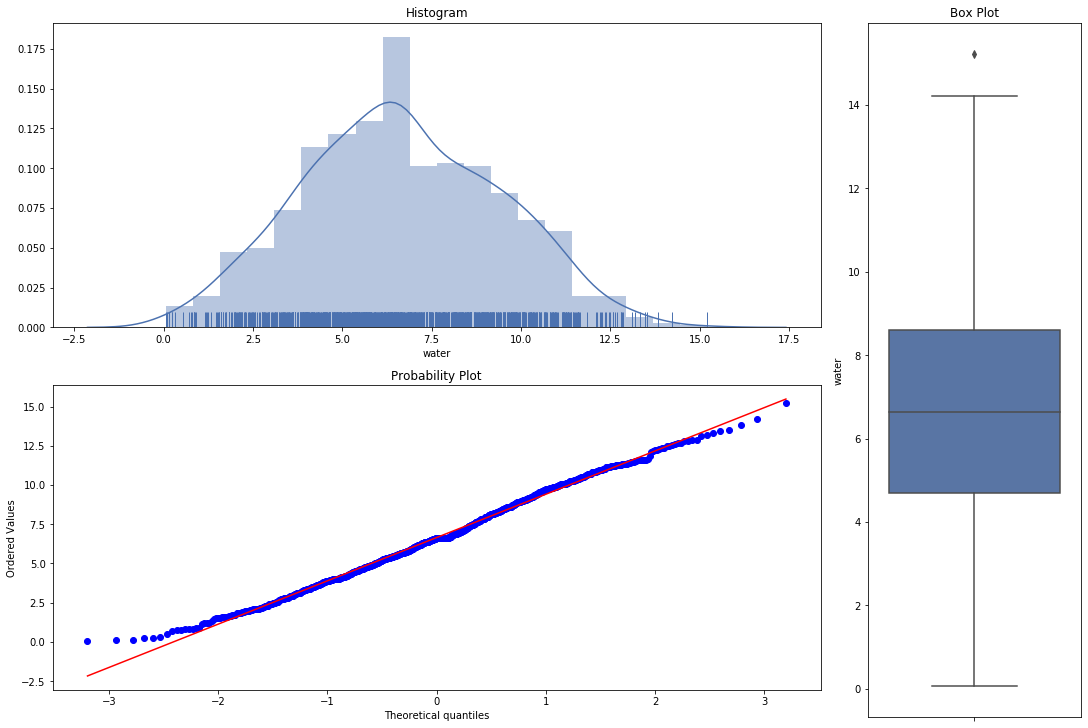

In [38]:
plot_charts_3(df_farm, 'water')

Water is now normally distributed. Now, Analysing relation between *water* and *yield*

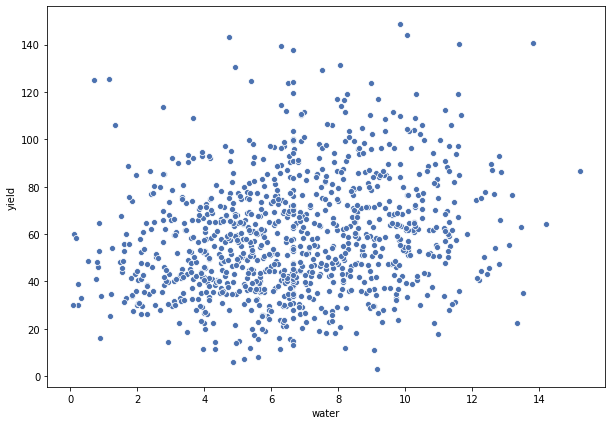

In [39]:
#scatter plot water/yield

customized_scatterplot(df_farm['yield'], df_farm['water'])

### Observations

- The data is normally distributed.
- There is no medium linear ralationship between yield and water

### #*uv*

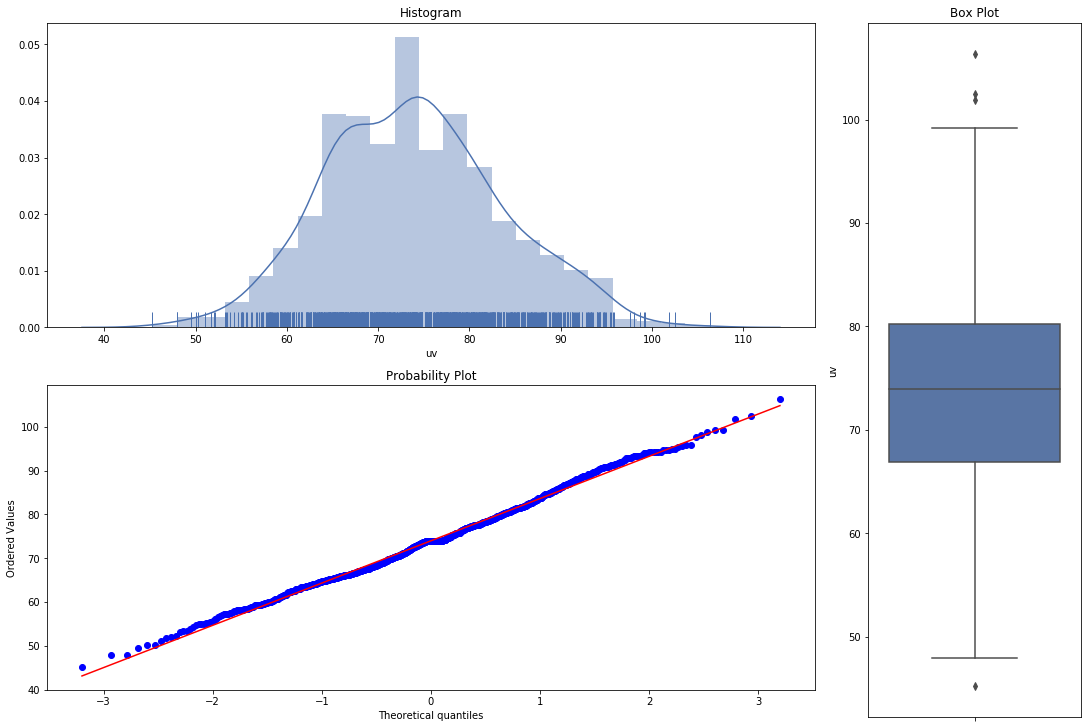

In [40]:
# plot

plot_charts_3(df_farm, 'uv')

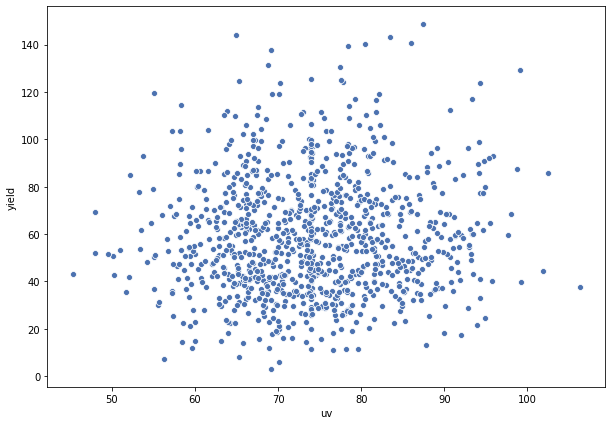

In [41]:
#scatter plot uv/yield

customized_scatterplot(df_farm['yield'], df_farm['uv'])

### Observarions

- Before treating missing values the data was bimodal normally distributed but now its unimodal normally distributed.
- Weak relation between *uv* and *yield*

### #*pesticide_count*

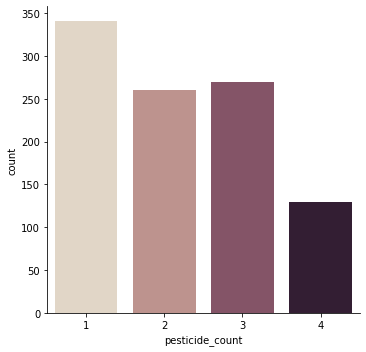

In [42]:
# countplot of pesticide_count

customized_countplot(df_farm, 'pesticide_count')

Mostly only one pesticide have been used in any farm.

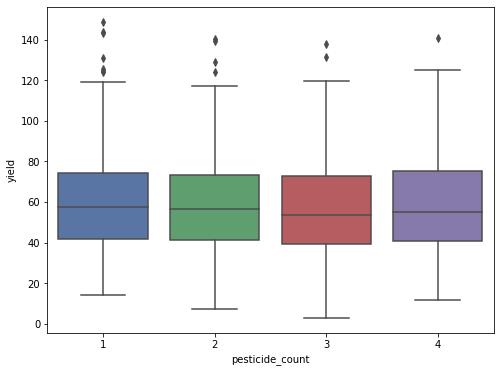

In [43]:
#box plot pesticide_count/yield

var = 'pesticide_count'
data = pd.concat([df_farm['yield'], df_farm[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="yield", data=data)

*'pesticide_count'* has no variation against its categories with the target variable *'yield'*

### Correlation Matrix

Visualizing the correlation matrix to check correlations among columns by drawing a heatmap. 

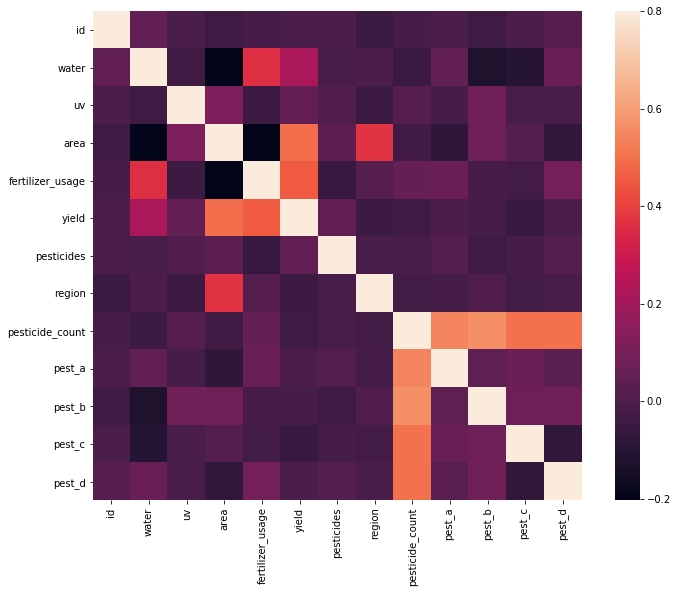

In [44]:
#correlation matrix
corrmat = df_farm.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [45]:
df_farm.corr()

,id,water,uv,area,fertilizer_usage,yield,pesticides,region,pesticide_count,pest_a,pest_b,pest_c,pest_d
id,1.000000,0.049267,-0.004875,-0.035514,-0.013106,-0.005227,-0.002752,-0.050065,-0.012625,-0.005817,-0.036595,-0.005101,0.020258
water,0.049267,1.000000,-0.036669,-0.203463,0.357191,0.219526,-0.011166,-0.000744,-0.049921,0.048509,-0.124099,-0.104693,0.070745
uv,-0.004875,-0.036669,1.000000,0.117420,-0.041766,0.053171,0.005743,-0.046667,0.021037,-0.018487,0.086085,-0.011313,-0.010939
area,-0.035514,-0.203463,0.117420,1.000000,-0.202512,0.491220,0.036302,0.369481,-0.027078,-0.076037,0.076959,0.017628,-0.073242
fertilizer_usage,-0.013106,0.357191,-0.041766,-0.202512,1.000000,0.452183,-0.056462,0.022406,0.062881,0.069182,-0.011634,-0.023828,0.096920
yield,-0.005227,0.219526,0.053171,0.491220,0.452183,1.000000,0.048380,-0.045051,-0.036408,-0.000003,-0.016796,-0.054475,-0.006612
pesticides,-0.002752,-0.011166,0.005743,0.036302,-0.056462,0.048380,1.000000,-0.010899,-0.008781,0.015542,-0.037118,-0.017847,0.019877
region,-0.050065,-0.000744,-0.046667,0.369481,0.022406,-0.045051,-0.010899,1.000000,-0.024035,-0.019701,0.005027,-0.025086,-0.011070
pesticide_count,-0.012625,-0.049921,0.021037,-0.027078,0.062881,-0.036408,-0.008781,-0.024035,1.000000,0.544555,0.568160,0.501472,0.501197
pest_a,-0.005817,0.048509,-0.018487,-0.076037,0.069182,-0.000003,0.015542,-0.019701,0.544555,1.000000,0.042800,0.065331,0.033843


The correlation mattrix shows that   
- The *'area'*, *'fertilizer_usage'* has a strong corellation with the target variable *'yield'* - Which makes intuitive sense :) 
- *'pesticide_count'* has a significant correlation with the *'pest_a'*, *'pest_b'*, *'pest_c'*, *'pest_d'* which is quite obvious as all derived from the same column.
- There is strong positive corellation between the water and fertilizer_usage.
- *'area'* and *'region'* are positivly corellated.
- There is strong negative corellation between *'area'* and *'fertilizer_usage'* which makes sense because fertilizer usage per hectare reduces as the area increases
- *'water'* and *'area'* are also negatively correlated.

Note: -0.2 is ideally not a strong corellation but since the data is very small and has absolutely no relation at all we can pick-up these small positive and negative deviation to understand how they are co-related.

## 4. Model Building

First, I am building a linear regression model to establish the relationship between 'yield' and the remaining variables


#### Scaling the numerical variables to make them comparable

In [46]:
mean = df_farm['water'].mean()
std = df_farm['water'].std()

df_farm['water'] = ((df_farm['water'] - mean) / std)

mean = df_farm['uv'].mean()
std = df_farm['uv'].std()

df_farm['uv'] = ((df_farm['uv'] - mean) / std)

mean = df_farm['area'].mean()
std = df_farm['area'].std()

df_farm['area'] = ((df_farm['area'] - mean) / std)

mean = df_farm['pesticides'].mean()
std = df_farm['pesticides'].std()

df_farm['pesticides'] = ((df_farm['pesticides'] - mean) / std)

In [47]:
# Assigning independent and predictor variables to X and y

X = df_farm.iloc[:, [1,2,3,4,6,7,8,9,10,11,12]]
print(X)
y = df_farm.iloc[:, 5]
print(type(y))


            water            uv      area  fertilizer_usage  pesticides  \
0   -3.773833e-01 -8.993094e-01 -1.808211                 0    2.656191   
1    1.405653e-01 -6.617864e-02  0.364755                 0    1.803005   
2   -3.802829e-01 -1.442741e+00 -1.944138                 2    1.912301   
3    9.749374e-01 -9.575602e-01 -1.969020                 2   -1.057479   
4    4.758364e-01 -7.364706e-15 -0.999709                 1   -1.530295   
..            ...           ...       ...               ...         ...   
995 -1.004675e-01  2.091068e+00  1.289501                 5   -0.270256   
996  1.173682e-01  9.089513e-01  1.175486                 5    0.022966   
997 -3.219250e-16 -1.631382e+00  1.396460                 4    0.266115   
998  1.237355e+00 -6.273344e-01  1.288015                 4   -0.536034   
999  3.707244e-01 -7.364706e-15  2.001815                 5   -0.711775   

     region  pesticide_count  pest_a  pest_b  pest_c  pest_d  
0         0                3       1

In [48]:
backup = X.copy()

In [49]:
X.columns

Index(['water', 'uv', 'area', 'fertilizer_usage', 'pesticides', 'region',
       'pesticide_count', 'pest_a', 'pest_b', 'pest_c', 'pest_d'],
      dtype='object')

In [50]:
# Converting the region and fertilizer usage columns to dummy variables

def process_cat(df,col):    
    temp =pd.get_dummies(df[col])
    cols = [col+"_"+str(x) for x in temp.columns]
    temp.columns = cols
    for column in temp.columns:
        df[column] = temp[column]
    del(df[col])
    return(df)

X  = process_cat(X,"region")
X  = process_cat(X,"fertilizer_usage")
X.head()

,water,uv,area,pesticides,pesticide_count,pest_a,pest_b,pest_c,pest_d,region_0,...,region_3,region_4,region_5,region_6,fertilizer_usage_0,fertilizer_usage_1,fertilizer_usage_2,fertilizer_usage_3,fertilizer_usage_4,fertilizer_usage_5
0,-0.377383,-8.993094e-01,-1.808211,2.656191,3,1,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0.140565,-6.617864e-02,0.364755,1.803005,3,1,0,1,1,1,...,0,0,0,0,1,0,0,0,0,0
2,-0.380283,-1.442741e+00,-1.944138,1.912301,2,1,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
3,0.974937,-9.575602e-01,-1.969020,-1.057479,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
4,0.475836,-7.364706e-15,-0.999709,-1.530295,2,0,0,1,1,1,...,0,0,0,0,0,1,0,0,0,0


In [51]:
# Fitting the regression model to the overall data to understand which features are important in
# establishing a strong relationship with yield
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
len(regressor.coef_)

22

<BarContainer object of 22 artists>

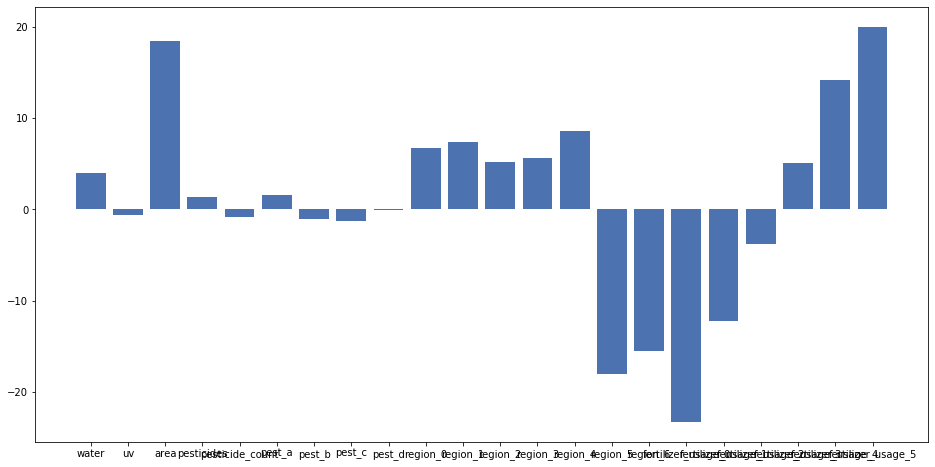

In [53]:
# Feature importance 
plt.figure(figsize=(16, 8))
plt.bar(X.columns, regressor.coef_.tolist())

Its noticeable that area, fertilizer_usage, water and region are the most important variables

creating linear regression model

In [54]:
# Splitting the dataset into the Training set and Test set (80-20 split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [55]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
regressor.score(X_test, y_test)

0.7164158818270636

R^2 score of 71% for this regression model suggests that using all the variables is able to explain 67% of the variation in the 
yield

In [57]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
water,3.941685
uv,-0.466572
area,18.195506
pesticides,1.376937
pesticide_count,-0.900560
pest_a,1.860113
pest_b,-1.280193
pest_c,-1.736356
pest_d,0.255876
region_0,7.461589


In [58]:
y_pred_train = regressor.predict(X_train)

In [59]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 10.4285725163537
Mean Squared Error: 170.84356193992298
Root Mean Squared Error: 13.07071390322361


In [60]:
train_error_LR = metrics.mean_absolute_error(y_train, y_pred_train)  
test_error_LR = metrics.mean_absolute_error(y_test, y_pred)

In [62]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
regressor.score(X_test, y_test) #r^2

0.7164158818270636

In [67]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 10.4285725163537
Mean Squared Error: 170.84356193992298
Root Mean Squared Error: 13.07071390322361


No improvement in the model performance

Taking all variables except uv and pest_d

In [68]:
X_train_new_1 = X_train.iloc[:, [0,2,3,4,5,6,7,8,9]]
X_test_new_1 = X_test.iloc[:, [0,2,3,4,5,6,7,8,9]]

In [69]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_new_1, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
# Predicting the Test set results
y_pred = regressor.predict(X_test_new_1)
regressor.score(X_test_new_1, y_test) #r^2

0.3651871259872015

In [71]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 15.367070528391372
Mean Squared Error: 382.4392327060022
Root Mean Squared Error: 19.55605360766845


No improvement in the model performance

# Trying an ensemble tree, Random forest

data: X_train, X_test, y_train, y_test

In [78]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 20, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [79]:
# Predicting a new result
y_pred = regressor.predict(X_test)

In [81]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 8.475423000000001
Mean Squared Error: 131.83610829975004
Root Mean Squared Error: 11.481990607022375


In [82]:
y_pred_train = regressor.predict(X_train)

In [83]:
train_error_RF = metrics.mean_absolute_error(y_train, y_pred_train)  
test_error_RF = metrics.mean_absolute_error(y_test, y_pred)

### Significant improvement in the model performance. Ensemble tree overcomes the drawback of linear regression

#### Now comparing the results of Random Forest against Gradient boosting tree. I have used XG Boosting algorithm to do so.

data: X_train, X_test, y_train, y_test

In [84]:
!pip install xgboost

  Using cached xgboost-1.0.2-py3-none-win_amd64.whl (24.6 MB)


In [91]:
# Fitting XGBoost to the Training set
import xgboost as xgb
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

## Finding the best features from the model

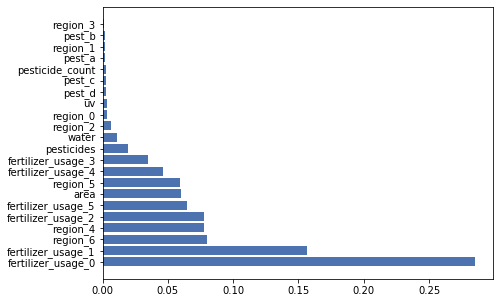

In [92]:
xgbr.feature_importances_
importances = pd.DataFrame()
importances["feature"] = X_train.columns
importances["importances"] = xgbr.feature_importances_
importances = importances.sort_values("importances",ascending = False)


import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
plt.barh(importances["feature"],importances["importances"])
plt.show()

In [93]:
y_pred = xgbr.predict(X_test)

In [94]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 6.418678423919679
Mean Squared Error: 77.64019745988534
Root Mean Squared Error: 8.811367513609074


In [89]:
y_pred_train = regressor.predict(X_train)

In [90]:
train_error_XGB = metrics.mean_absolute_error(y_train, y_pred_train)  
test_error_XGB = metrics.mean_absolute_error(y_test, y_pred)

# XG Boost turns out to be the best model so far. 
### Now comparing the model performance of various models.

In [95]:
train_error=[train_error_RF,train_error_XGB,train_error_LR]
test_error=[test_error_RF,test_error_XGB,test_error_LR]

col={'Train Error':train_error,'Test Error':test_error}
models=['Random Forest Regression','XG Boosting Reg','Linear Regression']
df=pd.DataFrame(data=col,index=models)
df

,Train Error,Test Error
Random Forest Regression,3.452430,8.475423
XG Boosting Reg,3.452430,6.418678
Linear Regression,9.676018,10.428573


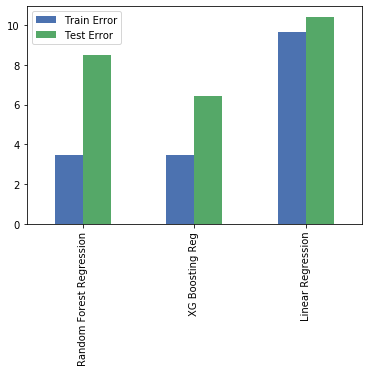

In [97]:
df.plot(kind='bar')

Note: The difference between the train and test error is comparitively high in XGB that linear regression but if linear regression is an underfit model for this data.

# Conclusion and Next Steps

1. Leverage the important features from XGBoost model -- Fertilizer usage 0, 1 in combination with region 6 and region 4 and having more area (Ofcourse constrained by cost of land) to improve the yield of the farm

2. Since we have a predictive model now, we have visibility into the future state of farm and we know what actions can lead to better yield, the farm management should apply cohesive actions using the model insights to improve the yield.

3. We can create A/B tests by assigning more area, more relevant pesticides in the important regions as control and not have nothing in the test areas to find the incremental yield

4. Since Area is a natural limitation  - obviously there is a cost constraint in terms of increasing more land for irrigation

5. Mean Absolute Error of 6.41 for XGBoost suggests that in comparison to an average yield of 58.78, our model is predicting 58.71 +/- 6.41 yield, which is pretty accurate considering so many factors involved in the model.


Next Steps:

1. Having additional features to include in model. For e.g. Having interaction variables by combining water and uv, water and fertilizer usage 
2. Regularization to improve model performance
3. Try different models for model performance
